# Week11 - Clustering Lab

* Create clusters for the following dataset
* Choose a meaningful cluster count
* Identify potential labels for each cluster

In [1]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import pandas as pd

def get_data():
    r = urllib2.urlopen("https://github.com/msaricaumbc/DS_data/blob/master/ds602/people_wiki.zip?raw=true").read()
    file = ZipFile(BytesIO(r))
    people_wiki_csv = file.open("people_wiki.csv")
    people = pd.read_csv(people_wiki_csv)
    people.drop('URI', inplace=True, axis=1)
    return people

people = get_data()
people.head()

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...


## Implementation of Count Vectorizer

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english', max_features=5000)
corpus = vec.fit_transform(people.text)
corpus = corpus.toarray()

In [3]:
corpus

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Implementing sparse matrix

**Implementation of sparse matrix representation which is used to save memory because the count vectorizer of text column has many values.**

In [4]:
from scipy.sparse import csr_matrix

corpus_sp = csr_matrix(corpus)

corpus_sp

<42786x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 4141027 stored elements in Compressed Sparse Row format>

## Plotting the elbow plot to find the optimal number of clusters

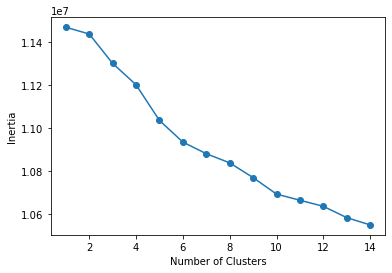

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = list()

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=0, n_init='auto')
    km = km.fit(corpus_sp)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

**From the elbow plot, I can say that from cluster number 13, there is an elbow which means it is the optimal cluster number.**

In [6]:
import warnings
warnings.filterwarnings("ignore")

## Implementing K-means clustering

In [7]:
k = 13

km = KMeans(n_clusters=k, random_state=42)

people['k_cluster'] = km.fit_predict(corpus_sp)

In [8]:
km.labels_

array([ 1,  2,  8, ..., 12,  2,  2])

In [9]:
pd.Series(km.labels_).value_counts()

2     15079
1      4351
5      4196
9      3717
8      3024
12     2679
7      2517
4      1849
6      1661
0      1297
10     1234
11      745
3       437
dtype: int64

In [10]:
pd.Series(km.labels_).nunique()

13

## Identify potential labels for each cluster 

In [11]:
c_labels = {}
for i in range(k):
    c_data = people[people['k_cluster'] == i]
    most_name = c_data['name'].mode().values[0] # Used mode function because the column has a text as the value
    c_labels[i] = f"Cluster Number {i + 1} ({most_name})"

for i, label in c_labels.items():
    print(label)

Cluster Number 1 (%C3%87a%C4%9Fan Irmak)
Cluster Number 2 (%C3%81ngel Garc%C3%ADa)
Cluster Number 3 ( Renate Lorenz)
Cluster Number 4 (Aaron Twerski)
Cluster Number 5 (A. J. Hammer)
Cluster Number 6 (%C3%81lvaro Gon%C3%A7alves)
Cluster Number 7 (%C3%81lvaro Pierri)
Cluster Number 8 (%C3%81ine Brady)
Cluster Number 9 (%C3%81sgeir Trausti)
Cluster Number 10 (%C3%81ine Hyland)
Cluster Number 11 (%C3%81ngel Salazar (baseball))
Cluster Number 12 (%C4%B0smail Ate%C5%9F)
Cluster Number 13 (%C3%81ron G%C3%A1dorfalvi)
